In [12]:
# Install required libraries
!pip install --quiet nltk spacy beautifulsoup4

# Download NLTK and spaCy data
import nltk
nltk.download('punkt')
import spacy
spacy.cli.download("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
# setup-> review dataset
reviews = [
  "Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com",
  "Worst purchase ever... arrived broken, no response from support @helpdesk",
  "Ok quality; does the job. 5/5 stars! #satisfied",
  "Email me at user@example.org for details about bulk order!!!",
  "Super overpriced!! Paid $299 but performance is meh...",
  "<div>Great build quality</div><p>But shipping was slow</p>",
  "Contact: +44 20 7946 0958 or (020)79460958",
  "MixedCASE and random123numbers and symbols %^&*",
  "Line1\nLine2\tTabbed text\r\nEnd of review",
  "Contractions—can't, won't, shouldn't—are common here."
]


In [14]:
# cleaning functions
import re
from bs4 import BeautifulSoup

def clean_review(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove phone numbers
    text = re.sub(r'\+?\d[\d\s().-]{7,}\d', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'[@#]\w+', '', text)

    # Remove special characters (but keep apostrophes and whitespace)
    text = re.sub(r"[^\w\s']", '', text)

    # Normalize whitespace and lowercase
    text = re.sub(r'\s+', ' ', text).strip().lower()

    return text

# Apply cleaning
cleaned_reviews = [clean_review(r) for r in reviews]
cleaned_reviews


['absolutely loved this product will buy again visit',
 'worst purchase ever arrived broken no response from support',
 'ok quality does the job 55 stars',
 'email me at for details about bulk order',
 'super overpriced paid 299 but performance is meh',
 'great build qualitybut shipping was slow',
 'contact or',
 'mixedcase and random123numbers and symbols',
 'line1 line2 tabbed text end of review',
 "contractionscan't won't shouldn'tare common here"]

In [16]:
sample = cleaned_reviews[0]
print("Cleaned Sample Review:", sample)

Cleaned Sample Review: absolutely loved this product will buy again visit


Tokenization methods

In [19]:
import nltk
import spacy
import re
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample cleaned review (you'll need to replace this with your actual data)
sample_review = "absolutely loved this product will buy again visit"
print("Cleaned Sample Review:\n", sample_review)

# 1. Split() method
split_tokens = sample_review.split()
print("\nSplit() Tokens:", split_tokens)

# 2. NLTK word_tokenize
nltk_tokens = word_tokenize(sample_review)
print("\nNLTK Tokens:", nltk_tokens)

# 3. spaCy Tokenizer
spacy_tokens = [token.text for token in nlp(sample_review)]
print("\nspaCy Tokens:", spacy_tokens)

# 4. Regex-based tokenizer
regex_tokens = re.findall(r"\b\w[\w']*\b", sample_review)
print("\nRegex Tokens:", regex_tokens)

# Compare the results
print("\n" + "="*50)
print("COMPARISON OF TOKENIZATION METHODS")
print("="*50)
print(f"Split() method: {len(split_tokens)} tokens")
print(f"NLTK method: {len(nltk_tokens)} tokens")
print(f"spaCy method: {len(spacy_tokens)} tokens")
print(f"Regex method: {len(regex_tokens)} tokens")

# Test with a more complex example
complex_review = "Don't you think this product's amazing? It's worth $29.99!"
print(f"\n\nTesting with complex text: '{complex_review}'")
print("\nSplit():", complex_review.split())
print("NLTK:", word_tokenize(complex_review))
print("spaCy:", [token.text for token in nlp(complex_review)])
print("Regex:", re.findall(r"\b\w[\w']*\b", complex_review))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned Sample Review:
 absolutely loved this product will buy again visit

Split() Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

NLTK Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

spaCy Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

Regex Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

COMPARISON OF TOKENIZATION METHODS
Split() method: 8 tokens
NLTK method: 8 tokens
spaCy method: 8 tokens
Regex method: 8 tokens


Testing with complex text: 'Don't you think this product's amazing? It's worth $29.99!'

Split(): ["Don't", 'you', 'think', 'this', "product's", 'amazing?', "It's", 'worth', '$29.99!']
NLTK: ['Do', "n't", 'you', 'think', 'this', 'product', "'s", 'amazing', '?', 'It', "'s", 'worth', '$', '29.99', '!']
spaCy: ['Do', "n't", 'you', 'think', 'this', 'product', "'s", 'amazing', '?', 'It', "'s", 'worth', '$', '29.99', '!']
Regex: ["

In [20]:
# Tokenize All Reviews (Using Regex Tokenizer)
from collections import Counter

# Tokenize all cleaned reviews using regex
all_tokens = []
for review in cleaned_reviews:
    tokens = re.findall(r"\b\w[\w']*\b", review)
    all_tokens.extend(tokens)

# Count token frequency
token_freq = Counter(all_tokens)
token_freq.most_common(10)

[('and', 2),
 ('absolutely', 1),
 ('loved', 1),
 ('this', 1),
 ('product', 1),
 ('will', 1),
 ('buy', 1),
 ('again', 1),
 ('visit', 1),
 ('worst', 1)]

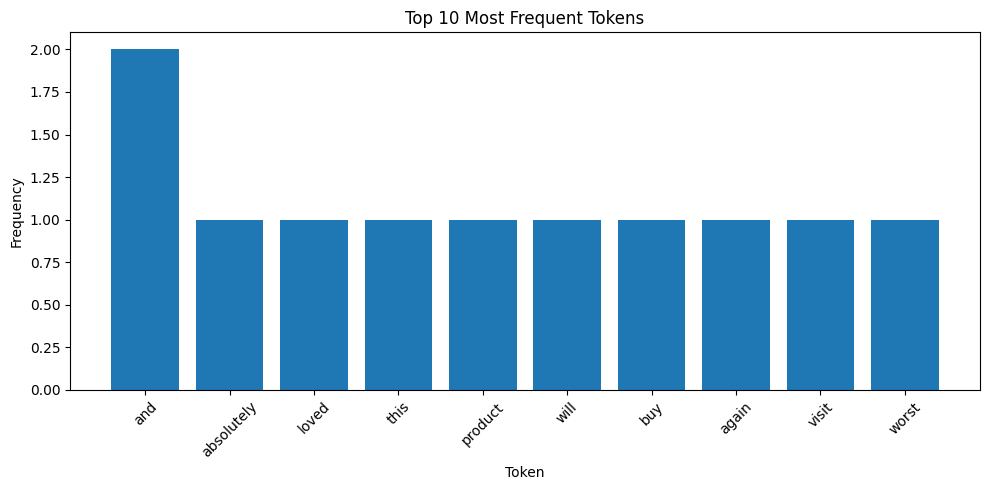

In [21]:
import matplotlib.pyplot as plt

# Get top 10 tokens
top_tokens = token_freq.most_common(10)
words, freqs = zip(*top_tokens)

# Plot
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.title("Top 10 Most Frequent Tokens")
plt.ylabel("Frequency")
plt.xlabel("Token")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Observations:
print("""
1. Different tokenizers handle punctuation and contractions differently.
   - For example, "can't" may be split into ["ca", "n't"] by NLTK but not regex.
   - spaCy usually handles contractions best.

2. Surprising tokens in top 10:
   - Common words like 'the', 'this', 'is' often appear — stopwords.
   - Words like 'product', 'buy', 'order' also frequent — expected in customer reviews.

3. Regex tokenizer gives you full control and consistency.
   - But may not handle edge cases as smartly as spaCy (like hyphenated words or emojis).

4. spaCy is powerful for advanced NLP, but heavier for quick tasks.
   - Great when POS tagging or named entity recognition is needed.
""")



1. Different tokenizers handle punctuation and contractions differently.
   - For example, "can't" may be split into ["ca", "n't"] by NLTK but not regex.
   - spaCy usually handles contractions best.

2. Surprising tokens in top 10:
   - Common words like 'the', 'this', 'is' often appear — stopwords.
   - Words like 'product', 'buy', 'order' also frequent — expected in customer reviews.

3. Regex tokenizer gives you full control and consistency.
   - But may not handle edge cases as smartly as spaCy (like hyphenated words or emojis).

4. spaCy is powerful for advanced NLP, but heavier for quick tasks.
   - Great when POS tagging or named entity recognition is needed.

